Step 1: Import the necessary libraries

In [636]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


Step 2: Load Dataset

In [637]:
dt = pd.read_csv('titanic.csv')
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ANALYSING THE FEATURES:

SEX

In [638]:
dt.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

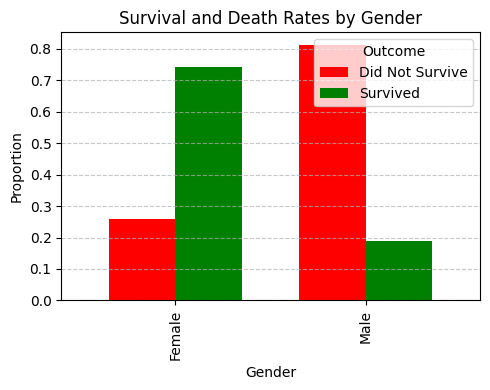

In [639]:
# Calculate survival and death rates by gender
survival_data = dt.groupby('Sex')['Survived'].value_counts(normalize=True).unstack()

# Plot the data
ax = survival_data.plot(
    kind='bar',
    stacked=False,
    figsize=(5, 4),
    color=['red', 'green'],
    width=0.7
)

# Customize the chart
plt.title('Survival and Death Rates by Gender')
plt.ylabel('Proportion')
plt.xlabel('Gender')
ax.set_xticklabels(['Female', 'Male'])  # Explicitly set labels
plt.legend(['Did Not Survive', 'Survived'], title='Outcome')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

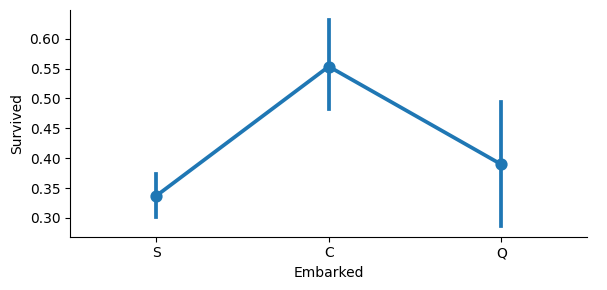

In [640]:
sns.catplot(x='Embarked', y='Survived', data=dt, kind='point', height=3, aspect=2)
plt.show()


In [641]:
# Check NaN (Dropping or replacing)
print(dt.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [642]:
# Data cleaning
dt['Embarked'] = dt['Embarked'].fillna(value=0)
dt['Age'] = dt['Age'].fillna(value=dt['Age'].median())

print(dt.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


In [643]:
# Making changes to feature
dt['Sex'] = dt['Sex'].replace(['male', 'female'], [0, 1])
dt['Embarked'] = dt['Embarked'].replace(['S', 'C', 'Q'], [0, 2, 1])
dt = dt.drop(columns=['Cabin', 'PassengerId', 'Name', 'Ticket'])
dt

/var/folders/8_/g5skmwpj36d4g7b3fcvrjccw0000gn/T/ipykernel_42865/2113419070.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt['Sex'] = dt['Sex'].replace(['male', 'female'], [0, 1])
/var/folders/8_/g5skmwpj36d4g7b3fcvrjccw0000gn/T/ipykernel_42865/2113419070.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dt['Embarked'] = dt['Embarked'].replace(['S', 'C', 'Q'], [0, 2, 1])


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,28.0,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,2


Correlation matrix

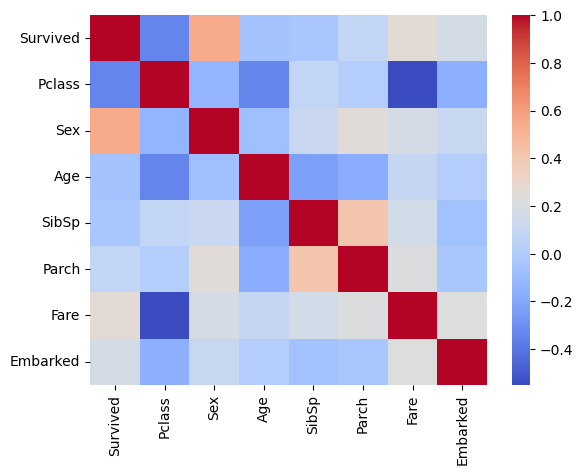

In [644]:
# Correlation heatmap
dt_corr = dt.corr()
sns.heatmap(dt_corr, cmap='coolwarm')
plt.show()

In [645]:
#Sibsp is highly correlated with Parch
dt = dt.drop(columns=['SibSp'])

In [646]:

# Standardization
scale = ['Age', 'Fare']
for i in scale:
    dt[i] = (dt[i] - dt[i].mean()) / dt[i].std()

Splitting Data

In [647]:
# Splitting data
target_column = 'Survived'  
shuffled_indices = np.random.permutation(len(dt))
dt_shuffled = dt.iloc[shuffled_indices]

# Define the split ratio
split_ratio = 0.8
split_index = int(len(dt) * split_ratio)

# Split the data
train_data = dt_shuffled.iloc[:split_index]
test_data = dt_shuffled.iloc[split_index:]

# Separate features and target variable
x_train = train_data.drop(target_column, axis=1)
y_train = train_data[target_column].values.reshape(-1, 1)  # Reshape for consistency
x_test = test_data.drop(target_column, axis=1)
y_test = test_data[target_column].values.reshape(-1, 1)  # Reshape for consistency

Logistic Model

In [648]:
class LogisticRegression:
    def __init__(self, learning_rate=0.1, n_iterations=500):        
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    @staticmethod
    def sigmoid(z):      
       # Compute the sigmoid function.

        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        
       #Compute the cost function for logistic regression.
        
        n_samples = X.shape[0]
        predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)
        cost = -(1 / n_samples) * np.sum(
            y * np.log(predictions) + (1 - y) * np.log(1 - predictions)
        )
        return cost

    def fit(self, X, y):
        
        #Fit the logistic regression model to the training data.
    
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))
        self.bias = np.random.random()

        for i in range(self.n_iterations):
            # Compute predictions
            predictions = self.sigmoid(np.dot(X, self.weights) + self.bias)

            # Gradient descent
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute cost for logging
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
    

    def predict(self, X):
        
       # Make predictions using the logistic regression model.
        
        linear_model = np.dot(X, self.weights) + self.bias
        probabilities = self.sigmoid(linear_model)

        return np.where(probabilities > 0.5, 1, 0)

Predict Logistic Model

In [649]:
# Create an instance of LogisticRegression
model = LogisticRegression()

# Fit the model with training data
model.fit(x_train, y_train)

# Make predictions on the test data
predictions = model.predict(x_test)
predictions_train = model.predict(x_train)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
accuracy_train = np.mean(predictions_train == y_train)

print(f"Accuracy of train data: {accuracy_train:.2f}")
print(f"Accuracy of test data: {accuracy:.2f}")

Accuracy of train data: 0.80
Accuracy of test data: 0.78


SVM Model

In [650]:
class svm:
    def __init__(self, learning_rate=0.01, lambda_param=0.0000001, n_iterations=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Convert labels to +1/-1
        y_ = np.where(y == 0, -1, 1)

        for _ in range(self.n_iterations):
            for x_i, y_i in zip(X, y_):
                condition = y_i * (np.dot(x_i, self.weights) + self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (2 * self.lambda_param * self.weights - np.dot(x_i, y_i))
                    self.bias -= self.learning_rate * y_i

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        predictions = np.where(linear_output >= 0, 1, 0)
        return predictions

# Convert to numpy arrays with appropriate data types if needed
x_train = np.array(x_train, dtype=np.float64)
y_train = np.array(y_train, dtype=np.int64)

Predict SVM Model

Accuracy of train data: 0.70
Accuracy of test data: 0.68
Precision (test): 0.40
Recall (test): 0.44
F1 Score (test): 0.42


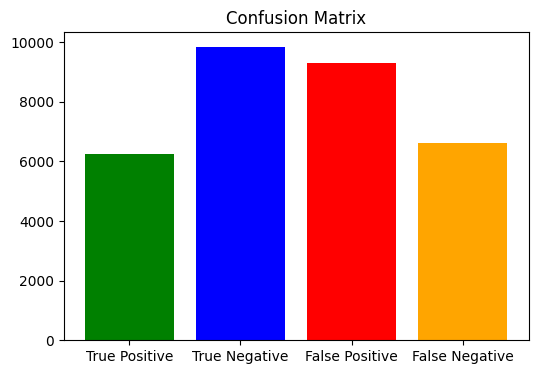

In [651]:
# Create an instance of SVM
model_svm = svm()

# Fit the model with training data
model_svm.fit(x_train, y_train.ravel())

# Make predictions on the test and train data
predictions_test = model_svm.predict(x_test)
predictions_train = model_svm.predict(x_train)

# Calculate accuracy
accuracy_test = np.mean(predictions_test == y_test.ravel())
accuracy_train = np.mean(predictions_train == y_train.ravel())

print(f"Accuracy of train data: {accuracy_train:.2f}")
print(f"Accuracy of test data: {accuracy_test:.2f}")

# Function to calculate Precision, Recall, and F1-Score manually
def calculate_metrics(y_true, y_pred):
    # Calculate confusion matrix elements
    tp = np.sum((y_true == 1) & (y_pred == 1))  # True Positive
    tn = np.sum((y_true == 0) & (y_pred == 0))  # True Negative
    fp = np.sum((y_true == 0) & (y_pred == 1))  # False Positive
    fn = np.sum((y_true == 1) & (y_pred == 0))  # False Negative
    
    # Calculate Precision, Recall, and F1-Score
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"Precision (test): {precision_test:.2f}")
    print(f"Recall (test): {recall_test:.2f}")
    print(f"F1 Score (test): {f1_test:.2f}")
    # Confusion matrix visualization
    plt.figure(figsize=(6, 4))
    plt.bar(['True Positive', 'True Negative', 'False Positive', 'False Negative'], [tp, tn, fp, fn], color=['green', 'blue', 'red', 'orange'])
    plt.title("Confusion Matrix")
    plt.show()
    return precision, recall, f1_score

# Calculate and print Precision, Recall, and F1-Score for test and train
precision_test, recall_test, f1_test = calculate_metrics(y_test, predictions_test)

